# **Neural Networks for Computer Vision**

## Abstract

This notebook explores the CNN architecture for computer vision tasks.

## Table of Contents

>[Neural Networks for Computer Vision](#scrollTo=TG6P7tXtt1GH)

>>[Abstract](#scrollTo=5-B_EZ0Ct8xf)

>>[Table of Contents](#scrollTo=X-H0SkAIt94e)

>>[Representation Learning](#scrollTo=z3IoDk2PuGHN)

>>[Fully Connected Neural Networks](#scrollTo=DCB-GXbz4xxr)

>>[Convolutional Neural Networks](#scrollTo=xlBfpeVm41tV)

>>>[ConvNets Overall Architecture](#scrollTo=TdXvNFWSyIfC)

>>>[Convolution Operation](#scrollTo=oxk_wiyUcMj1)

>>>[Convolution Layer](#scrollTo=sCow9s62e9Ip)

>>[Inductive Bias](#scrollTo=8YTDh9LQZz98)

>>>[Inductive Reasoning](#scrollTo=gqt1fUz8cbas)

>>>[Inductive Biases in Machine Learning](#scrollTo=K3jDBV-CcWRX)

>>>[Hypothesis Space](#scrollTo=R-jao7Kdfqtu)

>>>[Training Data Impact](#scrollTo=cDVq-H4-iIZB)

>>>[Inductive Bias of CNNs](#scrollTo=HfLaW6V_jV8w)

>>>>[Translation Equivariance Bias](#scrollTo=GqCdPD18pcW7)

>>>>[Translational Invariance Bias](#scrollTo=5ohweQA6pfGX)

>>[Spatial Arrangement](#scrollTo=N0qswy7wsJHy)

>>>[Depth](#scrollTo=INq36fcdsgZ_)

>>>[Zero-Padding](#scrollTo=KkQY-fmWh4uM)

>>>[Receptive Field](#scrollTo=i3uMhouYqtyq)

>>>[Strided Convolutions](#scrollTo=i3uMhouYqtyq)

>>[ConvNets Layers](#scrollTo=clzPKwnqutcW)

>>>[Pooling Layers](#scrollTo=Rmvg4S7-vw3G)

>>>[Batch Normalization](#scrollTo=cIHwnTNinmgc)

>>>[Layer Normalization](#scrollTo=Z4k9S5EpXC4u)



## Representation Learning

Traditional machine learning methods for computer vision have the crippling limitation of being invariant to most of the visual variations that an image may undergo, which makes the process of feature extraction much more complicated. This, in turn, hampers the downstream performance of the machine learning models.

Thus, neural networks are use to learn a stack of hierarchically abstracted features automatically from images, as shown in the figure below:

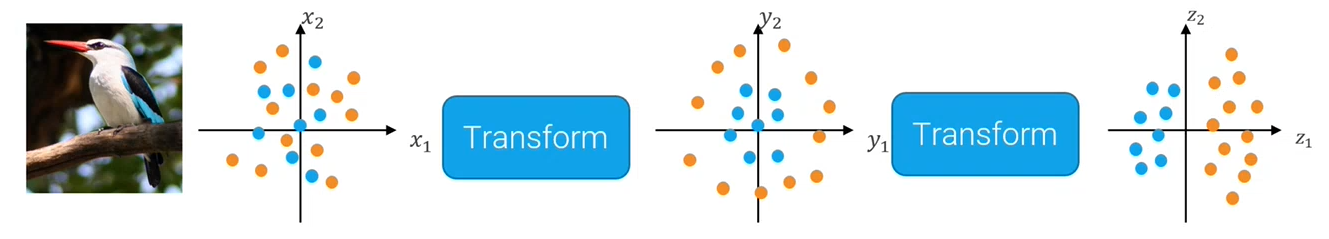

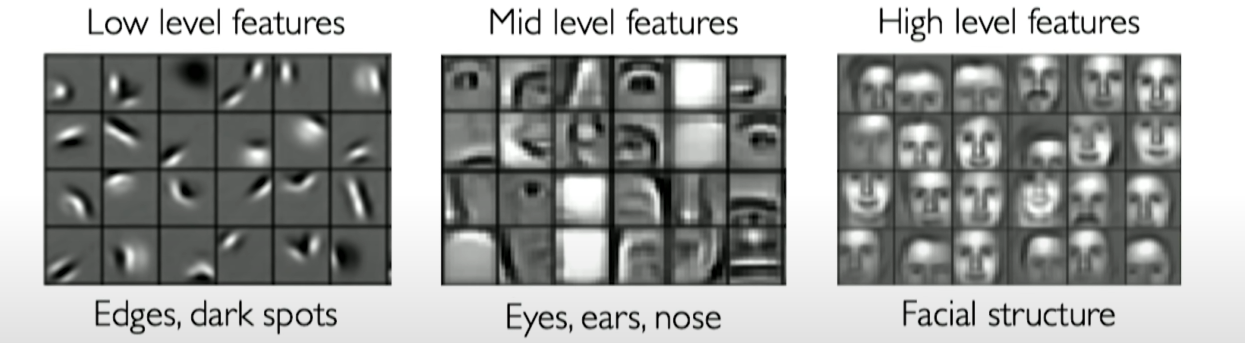

## Fully Connected Neural Networks

FC-NNs have two major flaws when dealing with images:

- Because images are inherently 2D arrays, they must be flattened in order to be processed by a fully connected NN. This essentially breaks up all the spatial structure of the image.

- The fully connected nature of these networks results in a huge number of parameters even when dealing with modest sized images.

## Convolutional Neural Networks

CNNs are the standard architecture of neural networks for image processing. They have the following advantages:

- They process images as 2D arrays, thus preserving their spatial structure.

- Convolutions have a local receptive field. This means that each output unit is solely connected to a local patch of the input image. This leads to a relatively much smaller number of trainable parameters.

- Unlike fully connected layers, parameters in CNNs are shared across all output units.

### ConvNets Overall Architecture

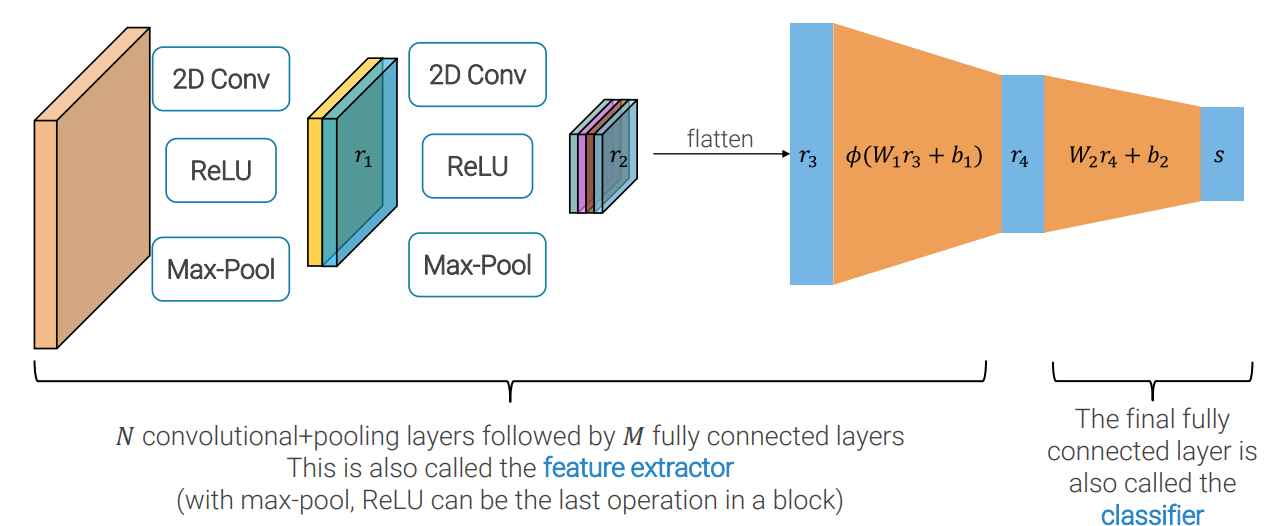

### Convolution Operation

For the following 3-channel RGB input image of width $W$ and height $H$, a $5$x$5$ convolution kernel is defined, whose depth is always implicitly defined and matches that of the input image (volumne). Thus, in this case, the number of trainable parameters is computed as $5 \times 5 \times 3 + 1 \; bias = 76 \;parameters$.

During the forward pass, the filter is convolved across the width and height of the input volume and dot products are computed between the entries of the filter and the input at any position. As the filter is slid over the width and height of the input volume, a 2-dimensional activation map that gives the responses of that filter at every spatial position is produced. Intuitively, the network will learn filters that activate when they see some type of visual feature such as an edge of some orientation or a blotch of some color on the first layer, or eventually entire honeycomb or wheel-like patterns on higher layers of the network.

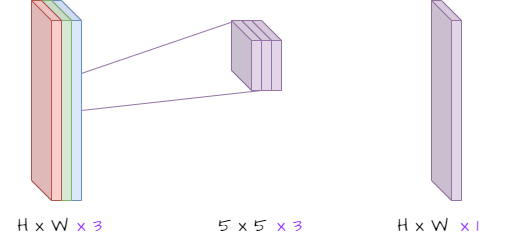

### Convolution Layer

A convolution layer will have an entire set of filters in (e.g. 32 filters), and each of them will produce a separate 2-dimensional activation map. these activation maps are stacked along the depth dimension and produce the output volume.

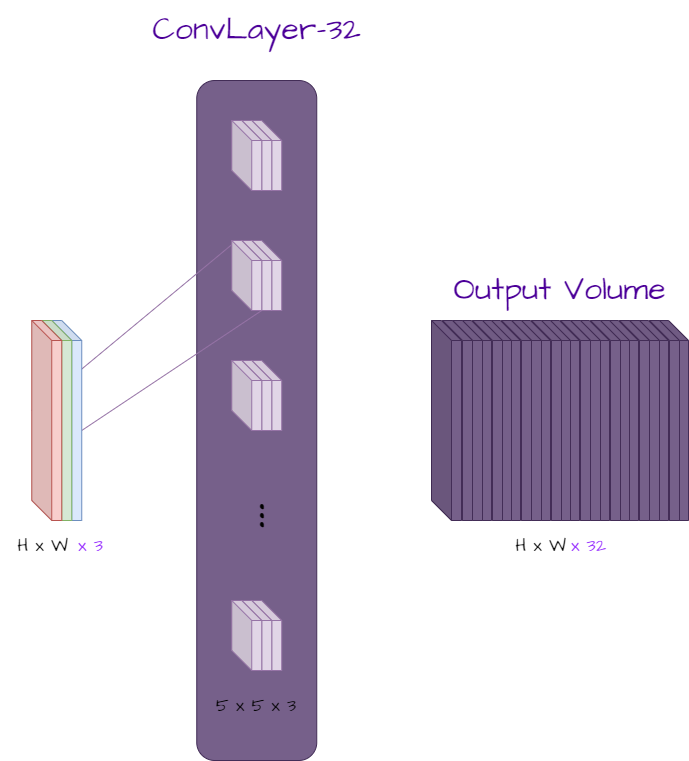

## Inductive Bias

Inductive bias (also known as learning bias) of a learning algorithm is a set of assumptions that the learner uses to predict outputs of given inputs that it has not encountered. More specifically, they're the set of assumptions the restrict the hypothesis space of the model to areas with better generalization.


### Inductive Reasoning

Imagine it’s your first time in Switzerland, you hike in mountains and come across a cow with spots and a cowbell. You may assume that all spotted cows in Switzerland have a cowbell. This is a typical example of **inductive reasoning**. It starts with an observation (a cow with spots and a cowbell) and leads to a possible generalization hypothesis (all cows with spots have a cowbell).

Notice that it is possible to induce other hypotheses based on the same observation. For example:
- There are cows in Switzerland.
- There are only cows in Switzerland. 
- All cows have a cowbell regardless of having spots.
- Etc. 

As one can see, it is possible to make a dozen of hypotheses based on a single observation — this is an important property of inductive reasoning: valid observation may lead to different hypotheses and some of them can be false.

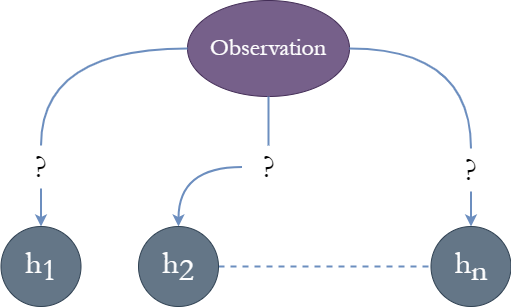

### Inductive Biases in Machine Learning

In machine learning tasks, we deal with some subset of observations (data points) and the goal is to create a generalization based on them. This generalization should be valid for new unseen data. In other words, the goal is to induce a general rule that works for the whole population of samples based on a limited sample subset.

So we have some set of observations and a set of hypotheses that can be induced based on them. The set of observations is our data and the set of hypotheses are ML algorithms with all the possible parameters that can be learned from this data. Each model can describe training data but provide significantly different results on new unseen data.



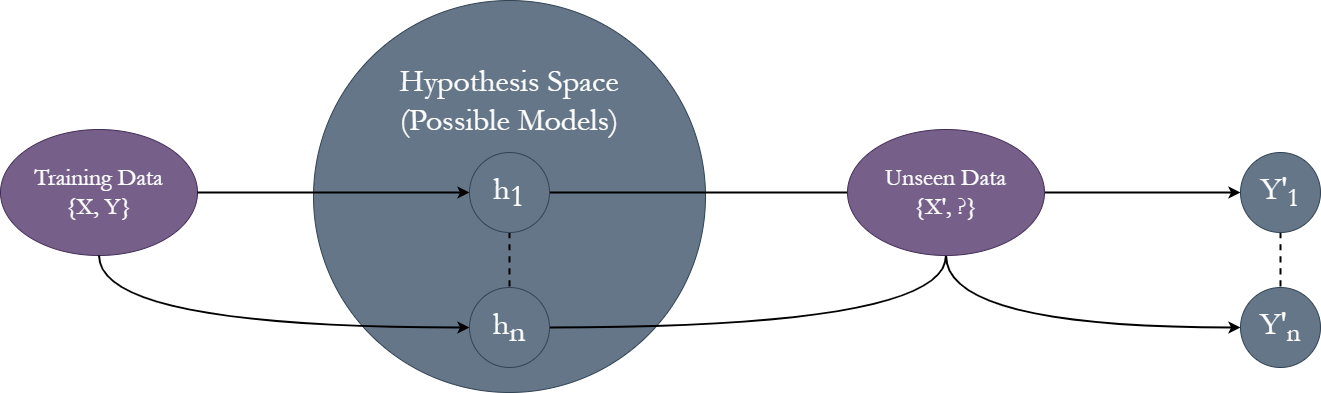

### Hypothesis Space

There is an infinite set of hypotheses for a finite set of samples. For example, consider the following observations of two points of some single-variable function. It is possible to fit a single linear model and an infinite amount of periodic or polynomial functions that perfectly fit the observations. Given the data, all of that functions are valid hypotheses that perfectly align with observations, and with no additional assumptions, choosing one over another is like making a random guess.

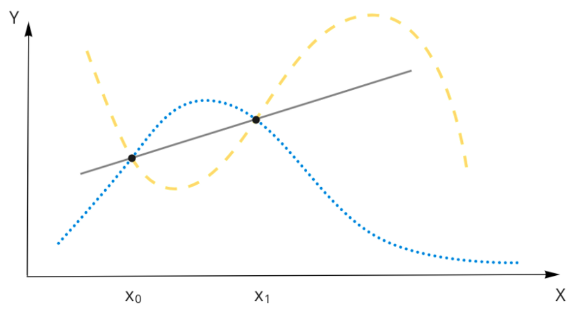

When inferring the hypothesis from the new unseen data, it turns out that most of the complicated functions are inaccurate. However, the linear function appears to be quite accurate, which should be already a familiar concept from a bias-variance tradeoff perspective.

The prioritization of some hypotheses (restriction of hypothesis space) is an inductive bias. So the model is biased toward some group of hypotheses. For the previous example, one can choose a linear model based on some prior knowledge about data and thus prioritize linear generalization.

### Training Data Impact

As one can see from the previous example, choosing the right induction bias of the model leads to better generalization, especially in a low data setting. The less training data we have, the stronger inductive bias should be to help the model to generalize well. But in a rich data setting, it may be preferable to avoid any induction bias to let the model be less constrained and search through the hypothesis space freely.

### Inductive Bias of CNNs

The main inductive biases of CNN architectures are locality and weight sharing.
- Locality implies that closely placed pixels are correlated to each other. 
- Weight sharing implies searching for specific patterns (e.g. edges). Thus, different parts of an image should be processed in the same way. 


#### Translation Equivariance Bias

Two more inductive biases are usually implemented into CNNs: translational equivariance with convolutional layers and translational invariance with pooling layers.

Translational Equivariance is a very important property of the convolutional neural networks where the position of the object in the image should not be fixed in order for it to be detected by the CNN. 

The property of translational equivariance is achieved in CNN’s by the concept of **weight sharing**. As the same weights are shared across the images, hence if an object occurs in any image it will be detected irrespective of its position in the image. This property is very useful for applications such as image classification, object detection, etc. where there may be multiple occurrences of the object or the object might be in motion.

Convolutional Neural Networks are not naturally equivariant to some other transformations such as changes in the scale or rotation of the image. Other mechanisms are required to handle such transformations.

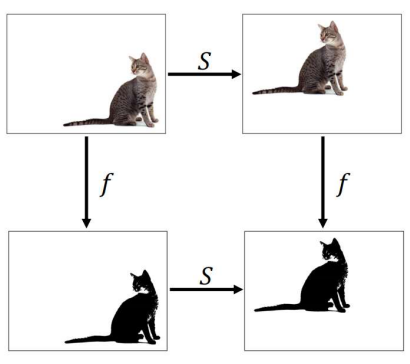

#### Translational Invariance Bias

 Translational Invariance makes the CNN invariant to translation. Invariance to translation means that if we translate the inputs the CNN will still be able to detect the class to which the input belongs.

Translational Invariance is a result of the **pooling operation**. In a traditional CNN architecture, there are three stages. 
  - In the first stage, the layer performs convolution operation on the input to give linear activations. 
  - In the second stage, the resultant activations are passed through a non-linear activation function such as sigmoid, tanh or relu. 
  - In the third stage, we perform the pooling operation to modify the output further.

In pooling operation, we replace the output of the convnet at a certain location with a summary statistic of the nearby outputs such a maximum in case of Max Pooling. As we replace the output with the max in case of max-pooling, hence even if we change the input slightly, it won’t affect the values of most of the pooled outputs. Translational Invariance is a useful property where the exact location of the object is not required. For e.g if you are building a model to detect faces all you need to detect is whether eyes are present or not, it’s exact position is not necessary. While in segmentation tasks, the exact position is required.

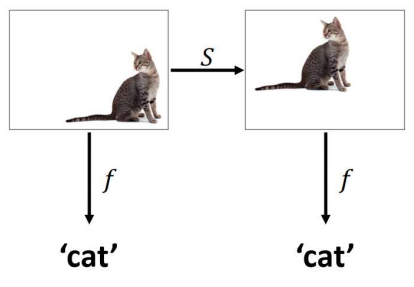

## Spatial Arrangement

If several convolution layers are stacked, feature/activation maps will shrink after each layer, as shown below:

$H_{out} = H_{in} - H_k + 1$

$W_{out} = W_{in} - W_k + 1$


Three hyperparameters allow the control of the size of the output volume: the **depth**, **stride** and **zero-padding**.

### Depth

As explained above, the depth of the output volume is a hyperparameter: it corresponds to the number of filters we would like to use, each learning to look for something different in the input. For example, if the first Convolutional Layer takes as input the raw image, then different neurons along the depth dimension may activate in presence of various oriented edges, or blobs of color.



### Zero-Padding
A common approach to control the output dimensions, is to pad those of the input with zeros. Thus:

$H_{out} = H_{in} - H_k + 1 + 2P$

$W_{out} = W_{in} - W_k + 1 + 2P$

Usually, the padding is set to $P = \frac{H_k - 1}{2}$ in order to have the same dimensions. 

### Receptive Field

Each output unit/neuron is connected to only a local region of the input volume. The spatial extent of this connectivity is a hyperparameter called the receptive field of the neuron (equivalently this is the filter size). Thus, the receptive field is simply the input pixels affecting the output unit.


### Strided Convolutions

Strided convolutions produce smaller output volumes spatially. They also increase the receptive field of the output activation features. Thus:

$W_{out} = \lfloor \frac{W_{in} - W_k + 2P}{S} \rfloor + 1$ 

$H_{out} = \lfloor \frac{H_{in} - H_k + 2P}{S} \rfloor + 1$ 

## ConvNets Layers

Besides convolutional layers, ConvNets are a composition of:

- Non-linear Activation Layers (ReLU)
- Pooling Layers (MaxPool and AvgPool)
- Batch Normalization Layers
- Fully Connected Layers

### Pooling Layers

It is common to periodically insert a Pooling layer in-between successive Conv layers in a ConvNet architecture. Its function is to:

- Progressively reduce the representation's spatial size, and thus reduce the amount of parameters and computation in the network.

- Inject some shift invariance in the ConvNet.

- Control overfitting.


The Pooling Layer has no trainable parameters, and operates independently on every depth slice of the input and resizes it spatially, using the MAX operation. The most common form is a pooling layer with filters of size 2x2 applied with a stride of 2. The depth dimension remains unchanged. More generally, the pooling layer:

- Accepts a volume of $(W_{in}, H_{in}, C_{in})$
- Requires two hyperparameters: 
  - Their spatial extent $F$
  - Their stride $S$

- Produces a volume of $(W_{out}, H_{out}, C_{out})$, where:
  - $W_{out} = \frac{W_{in} - F}{S} + 1$
  - $H_{out} = \frac{H_{in} - F}{S} + 1$
  - $C_{out} = C_{in}$


The most common MaxPooling hyperparameters are $F=S=2$.


### Batch Normalization

Batch normalization layers are used to ameliorate the Internal Covariate Shift problem. This phenomenon refers to the change in the distribution of network activations due to the change in network parameters during training, which complicates the training process.

During training time, the mean and variance are computed on the current mini-batch, which is then standardized as a normal distribution. At this point, another set of trainable mean and variance to reintroduce flexbility into the learned representation. Additionally, the model keeps track of a moving average of the mean and variance of the mini-batches to be used during inference time.

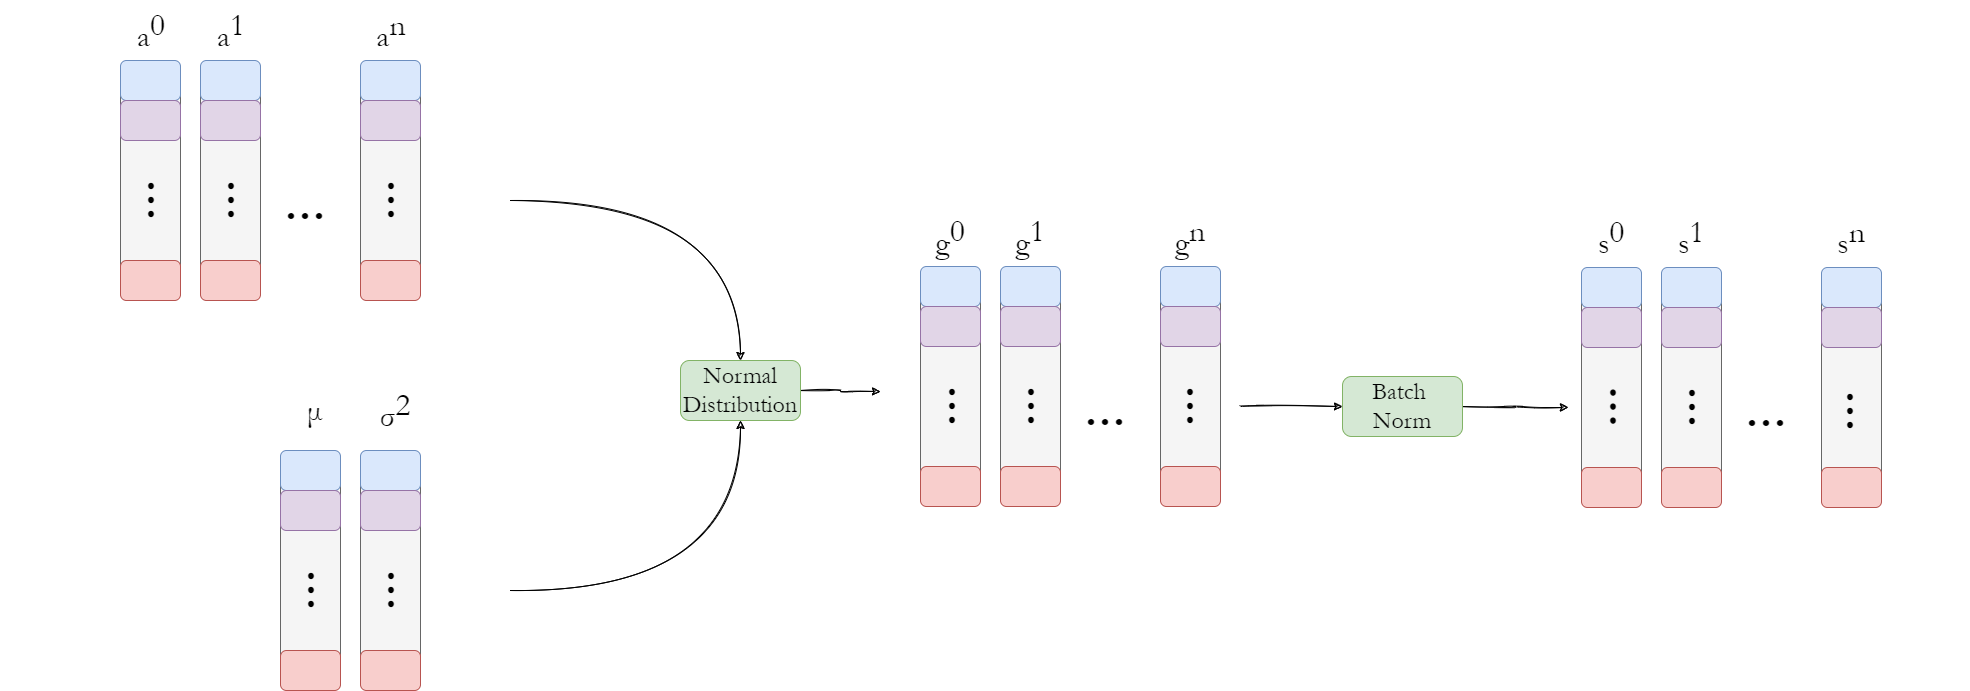

### Layer Normalization

The sole difference between batch and layer normalization is that the latter computes the mean and variance on the activation row. This means that the model behaviour regarding normalization is the same during training and inference.